# 1. First, we install required dependencies and setup. We have created a virtual environment by the name of 'toothdecay' for this project, so that installing dependencies does not impact other projects

In [1]:
!pip install tensorflow opencv-python matplotlib

You should consider upgrading via the 'C:\Users\raju0\Documents\Image-classification\ImageClassification\toothdecay\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.3.3
fonttools                    4.39.3
gast                         0.4.0
google-auth                  2.17.3
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.53.0
h5py                         3.8.0
idna                         3.4
importlib-metadata           6.4.1
importlib-resources          5.12.0
ipykernel                    6.22.0
ipyth

You should consider upgrading via the 'C:\Users\raju0\Documents\Image-classification\ImageClassification\toothdecay\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import tensorflow as tf
import os

# 2. We then remove dodgy images. These are basically files that are not in the required format. For example, when downloading from web, you may end up with a file by extension .webp, which is not ideal for our model. So, we ought to filter them out

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'main-dataset' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. We shall now load our data into our notebook

In [86]:
import numpy as np
from matplotlib import pyplot as plt

In [87]:
data = tf.keras.utils.image_dataset_from_directory('main-dataset') 

# This keras feature allows the making of a dataset, without us having to label it or so, using data pipelining.

Found 1135 files belonging to 2 classes.


In [88]:
data_iterator = data.as_numpy_iterator()

In [89]:
batch = data_iterator.next()

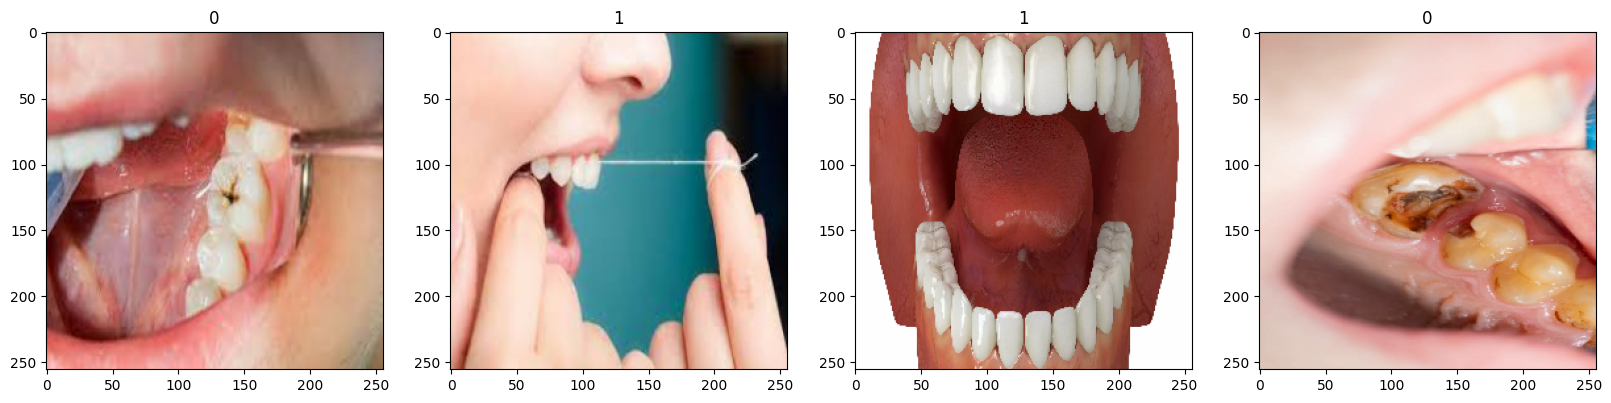

In [90]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Now we scale the data. In simpler terms, we are reducing the 0-255 range, which is the pixel color range, down between 0-1. This allows our model to generalize faster and give better results

In [91]:
data = data.map(lambda x,y: (x/255, y)) # x are images, y are image labels given by keras.utils.image_dataset_from_directory

In [92]:
scaled_iterator = data.as_numpy_iterator()

In [93]:
batch = scaled_iterator.next()

In [94]:
batch

(array([[[[0.6745098 , 0.88235295, 0.98039216],
          [0.6745098 , 0.88235295, 0.98039216],
          [0.6745098 , 0.88235295, 0.98039216],
          ...,
          [0.6745098 , 0.88235295, 0.98039216],
          [0.6745098 , 0.88235295, 0.98039216],
          [0.6679994 , 0.87909776, 0.98039216]],
 
         [[0.6740282 , 0.88211215, 0.98039216],
          [0.67167586, 0.88093597, 0.98039216],
          [0.67167586, 0.88093597, 0.98039216],
          ...,
          [0.67167586, 0.88093597, 0.98039216],
          [0.67167586, 0.88093597, 0.98039216],
          [0.6675178 , 0.87885696, 0.98039216]],
 
         [[0.673263  , 0.88172954, 0.98039216],
          [0.6671722 , 0.8786841 , 0.98039216],
          [0.6671722 , 0.8786841 , 0.98039216],
          ...,
          [0.6671722 , 0.8786841 , 0.98039216],
          [0.6671722 , 0.8786841 , 0.98039216],
          [0.6667526 , 0.87847435, 0.98039216]],
 
         ...,
 
         [[0.6727575 , 0.88147676, 0.98039216],
          [0.66666

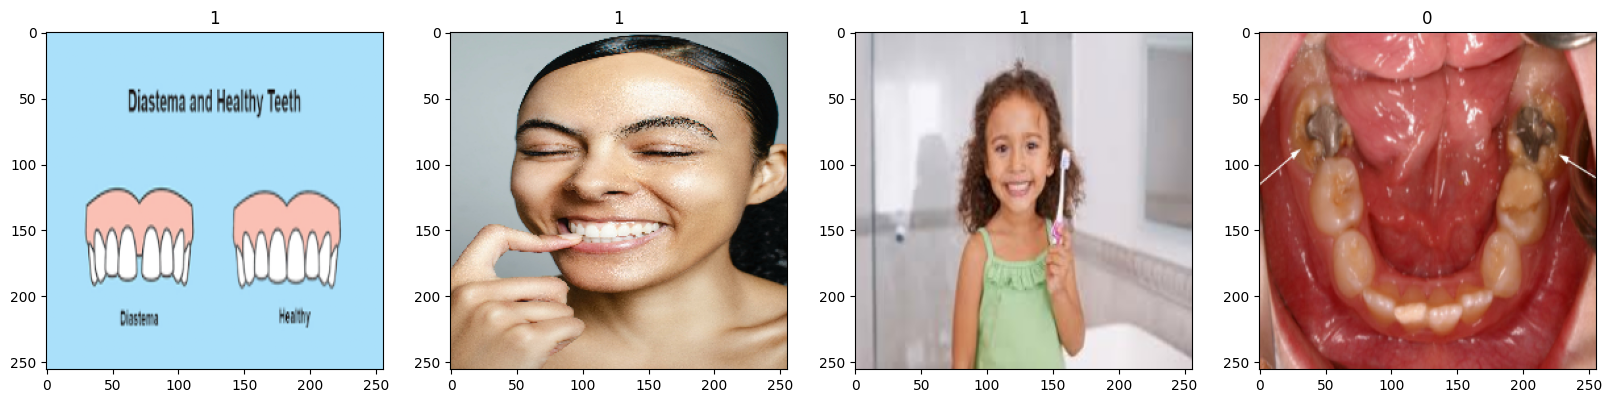

In [96]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [97]:
batch[0].max()

1.0

# 5. The next step is to split the data into training, validation and testing data. The ideal case for this is the 70-20-10 system. 70% training data, 20% validation data and 10% testing data

In [98]:
len('main-dataset')

12

In [99]:
train_size = int(len('main-dataset')*.7)
val_size = int(len('main-dataset')*.2) + 1
test_size = int(len('main-dataset')*.1)

In [100]:
train_size + val_size + test_size

12

In [101]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. We will now build our Deep Learning model. We shall be using the keras sequential model, as we wish to lookout for just two parameters for now, without any special customization

In [102]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [104]:
model = Sequential()

## Note: We add a Dropout layer to reduce our variance. In graphic terms, variance is the distance between the train data loss and validation data loss during training. We shall see that in the graphs later on

In [105]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3, noise_shape = None, seed = None))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [106]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)       

# 7. We will now train our model

In [108]:
logdir='logs'

In [109]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

### test case: Epoch 17, Dropout 0.3, Try Data Augmentation. Use overleaf to share report. Since we are usinf Sequential model, algorithm is binary classification


In [110]:
hist = model.fit(train, epochs=18, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/18
8/8 [==============================] - 17s 2s/step - loss: 2.0730 - accuracy: 0.5391 - val_loss: 0.7880 - val_accuracy: 0.5312
Epoch 2/18
8/8 [==============================] - 12s 1s/step - loss: 0.8668 - accuracy: 0.5117 - val_loss: 0.6899 - val_accuracy: 0.5833
Epoch 3/18
8/8 [==============================] - 12s 1s/step - loss: 0.6564 - accuracy: 0.5273 - val_loss: 0.6751 - val_accuracy: 0.6354
Epoch 4/18
8/8 [==============================] - 12s 1s/step - loss: 0.6689 - accuracy: 0.5156 - val_loss: 0.6898 - val_accuracy: 0.5625
Epoch 5/18
8/8 [==============================] - 12s 1s/step - loss: 0.6370 - accuracy: 0.6289 - val_loss: 0.6568 - val_accuracy: 0.7396
Epoch 6/18
8/8 [==============================] - 11s 1s/step - loss: 0.5910 - accuracy: 0.6992 - val_loss: 0.6511 - val_accuracy: 0.6771
Epoch 7/18
8/8 [==============================] - 11s 1s/step - loss: 0.5963 - accuracy: 0.6641 - val_loss: 0.6255 - val_accuracy: 0.8021
Epoch 8/18
8/8 [==================

# 8. We shall plot the model data per epoch to get a better idea of our model's performance

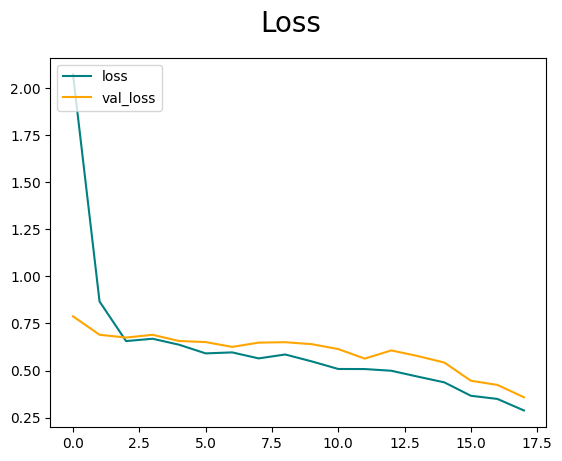

In [112]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Notice that the lines are not too far apart. This is because the dropout layer corrected the variance that occured during training

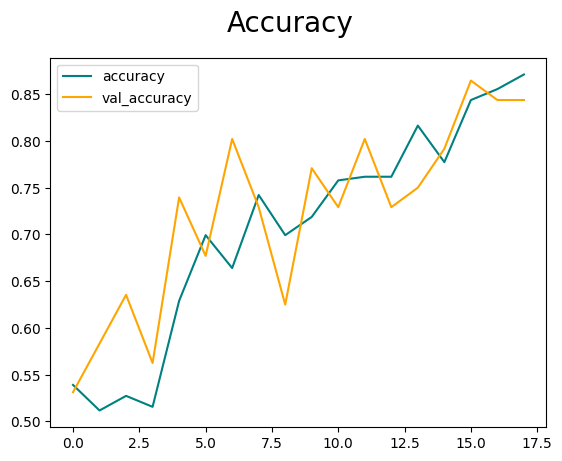

In [113]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Now, we evaluate our model to check the coorectness of what we've built

In [114]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [115]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [116]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 520ms/step


In [117]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.7777778, shape=(), dtype=float32) tf.Tensor(0.7777778, shape=(), dtype=float32) tf.Tensor(0.75, shape=(), dtype=float32)


# 10. Now that the evaluation is done, let us test the model

In [155]:
import cv2
from matplotlib import pyplot as plt

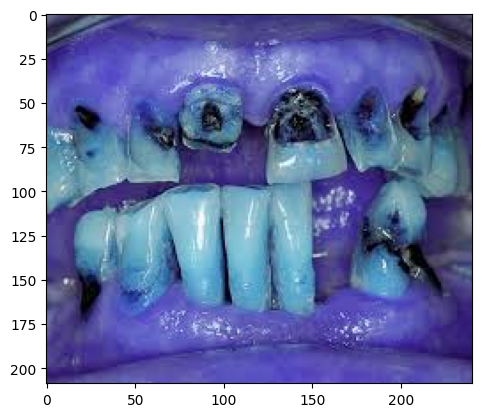

In [167]:
img = cv2.imread('71.jpg')
plt.imshow(img)
plt.show()


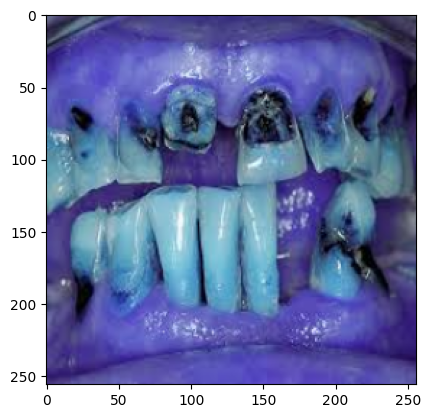

In [168]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [169]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 289ms/step


In [170]:
yhat

array([[0.06135859]], dtype=float32)

In [171]:
if yhat < 0.50: 
    print(f'Decay Detected!! You need consulting. Visit your nearest Dentist soon')
else:
    print("Great!! You've got a healthy set of teeth. Look after them and maintain them well to protect that smile")

Decay Detected!! You need consulting. Visit your nearest Dentist soon


# 11. We now save the model for future uses

In [140]:
from tensorflow.keras.models import load_model

In [141]:
model.save(os.path.join('models','toothdecaymodel.h5'))

In [142]:
new_model = load_model(os.path.join('models','toothdecaymodel.h5'))

In [143]:
new_model

In [144]:
yhat_check = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 161ms/step


In [145]:
yhat_check

array([[0.39250013]], dtype=float32)

In [148]:
if yhat < 0.50: 
    print(f'Decay Detected!! You need consulting. Visit your nearest Dentist soon')
else:
    print("Great!! You've got a healthy set of teeth. Look after them and maintain them well to protect that smile")

Decay Detected!! You need consulting. Visit your nearest Dentist soon


In [147]:
!pip install streamlit

You should consider upgrading via the 'C:\Users\raju0\Documents\Image-classification\ImageClassification\toothdecay\Scripts\python.exe -m pip install --upgrade pip' command.



  Using cached streamlit-1.12.0-py2.py3-none-any.whl (9.1 MB)
  Using cached altair-4.2.2-py3-none-any.whl (813 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
  Using cached GitPython-3.1.31-py3-none-any.whl (184 kB)
